# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [2]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 48.3 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 71.1 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 73.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 63.2 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 73.2 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 61.7 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 76.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 67.9 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=6d6d4f7b817aa0c64b0115df9cb88fc7f55fbe03e2c7dc831a913ae41fad71b3
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from torchvision import datasets
from torch.utils.data import DataLoader

In [4]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to a standardized scale
])

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I have converted the images to tensors and normalized the pixel values to a standardized scale, which will help the model to learn more effectively and achieve faster convergence while avoiding problems like vanishing gradients.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


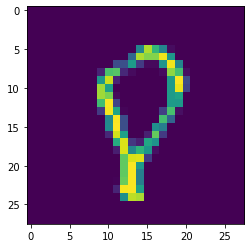

3


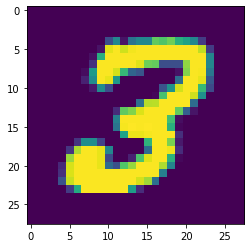

4


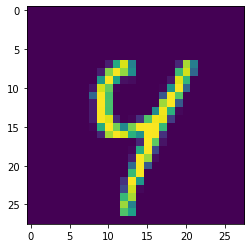

1


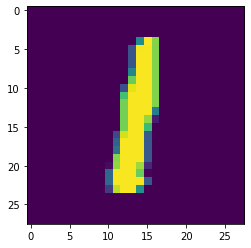

2


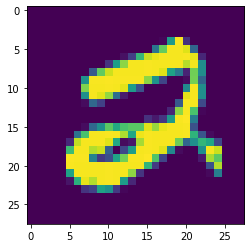

In [7]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = nn.ReLU()
        self.layer1 = nn.Linear(28 * 28, 128)  #Input size is 28*28 since MNIST images are 28x28 pixels, and the first hidden layer has 128 units
        self.layer2 = nn.Linear(128, 64)  # Second hidden layer with 64 units
        self.layer3 = nn.Linear(64, 10)   # Output layer with 10 units (for the 10 classes)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

# Instantiate the model
model = Net().to(device)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
## YOUR CODE HERE ##

# Choose a loss function
criterion = nn.CrossEntropyLoss()
# Choose an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
num_epochs = 10
print_interval = 250
losses = []
# Training the model
for epoch in range(num_epochs):
    total_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if (i + 1) % print_interval == 0:
            average_loss = total_loss / print_interval
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Average Loss: {average_loss:.4f}')
            losses.append(average_loss)
            total_loss = 0.0

Epoch [1/10], Step [250/938], Average Loss: 0.6532
Epoch [1/10], Step [500/938], Average Loss: 0.3387
Epoch [1/10], Step [750/938], Average Loss: 0.2719
Epoch [2/10], Step [250/938], Average Loss: 0.1987
Epoch [2/10], Step [500/938], Average Loss: 0.1914
Epoch [2/10], Step [750/938], Average Loss: 0.1773
Epoch [3/10], Step [250/938], Average Loss: 0.1434
Epoch [3/10], Step [500/938], Average Loss: 0.1357
Epoch [3/10], Step [750/938], Average Loss: 0.1338
Epoch [4/10], Step [250/938], Average Loss: 0.1077
Epoch [4/10], Step [500/938], Average Loss: 0.1084
Epoch [4/10], Step [750/938], Average Loss: 0.1163
Epoch [5/10], Step [250/938], Average Loss: 0.0961
Epoch [5/10], Step [500/938], Average Loss: 0.0994
Epoch [5/10], Step [750/938], Average Loss: 0.0913
Epoch [6/10], Step [250/938], Average Loss: 0.0763
Epoch [6/10], Step [500/938], Average Loss: 0.0824
Epoch [6/10], Step [750/938], Average Loss: 0.0761
Epoch [7/10], Step [250/938], Average Loss: 0.0714
Epoch [7/10], Step [500/938], A

Plot the training loss (and validation loss/accuracy, if recorded).

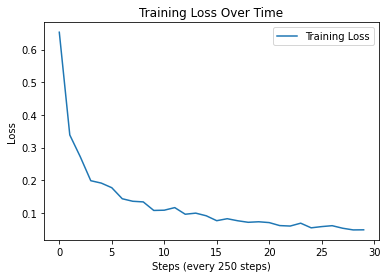

In [12]:
## YOUR CODE HERE ##
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Steps (every {} steps)'.format(print_interval))
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
## YOUR CODE HERE ##
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 97.18%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [14]:
## YOUR CODE HERE ##
##try to reduce the batch size:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
num_epochs = 10
print_interval = 250
losses = []
# Training the model
for epoch in range(num_epochs):
    total_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if (i + 1) % print_interval == 0:
            average_loss = total_loss / print_interval
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Average Loss: {average_loss:.4f}')
            losses.append(average_loss)
            total_loss = 0.0

Epoch [1/10], Step [250/1875], Average Loss: 0.0891
Epoch [1/10], Step [500/1875], Average Loss: 0.0860
Epoch [1/10], Step [750/1875], Average Loss: 0.0675
Epoch [1/10], Step [1000/1875], Average Loss: 0.0829
Epoch [1/10], Step [1250/1875], Average Loss: 0.0755
Epoch [1/10], Step [1500/1875], Average Loss: 0.0687
Epoch [1/10], Step [1750/1875], Average Loss: 0.0824
Epoch [2/10], Step [250/1875], Average Loss: 0.0588
Epoch [2/10], Step [500/1875], Average Loss: 0.0592
Epoch [2/10], Step [750/1875], Average Loss: 0.0539
Epoch [2/10], Step [1000/1875], Average Loss: 0.0633
Epoch [2/10], Step [1250/1875], Average Loss: 0.0719
Epoch [2/10], Step [1500/1875], Average Loss: 0.0641
Epoch [2/10], Step [1750/1875], Average Loss: 0.0586
Epoch [3/10], Step [250/1875], Average Loss: 0.0399
Epoch [3/10], Step [500/1875], Average Loss: 0.0543
Epoch [3/10], Step [750/1875], Average Loss: 0.0629
Epoch [3/10], Step [1000/1875], Average Loss: 0.0562
Epoch [3/10], Step [1250/1875], Average Loss: 0.0571
Ep

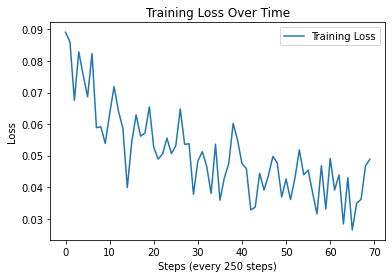

In [16]:
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Steps (every {} steps)'.format(print_interval))
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 97.36%


## Saving your model
Using `torch.save`, save your model for future loading.

In [18]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), 'mnist_model.pth')